# Chapter 11

# 11.7.1. Nonlinear least squares regression for parameter estimation

Fitted ka: 1.7425 1/hour
Fitted ke: 0.1331 1/hour


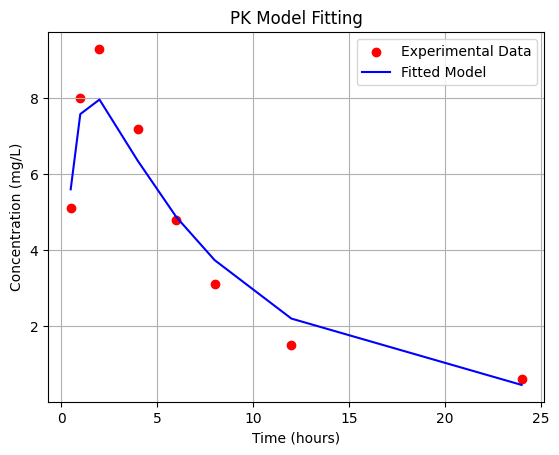

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the PK model (one-compartment, first-order absorption and elimination)
def pk_model(t, ka, ke):
    F = 1.0      # Bioavailability (fraction), assumed to be 1
    D = 500      # Dose in mg
    Vd = 50      # Volume of distribution in L
    C = (F * D * ka) / (Vd * (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return C

# Experimental data (time in hours, concentration in mg/L)
time_data = np.array([0.5, 1, 2, 4, 6, 8, 12, 24])
concentration_data = np.array([5.1, 8.0, 9.3, 7.2, 4.8, 3.1, 1.5, 0.6])

# Perform nonlinear least squares fitting
initial_guesses = [1.0, 0.1]  # Initial guesses for ka and ke
params, covariance = curve_fit(pk_model, time_data, concentration_data, p0=initial_guesses)

# Extract fitted parameters
ka_fitted, ke_fitted = params
print(f"Fitted ka: {ka_fitted:.4f} 1/hour")
print(f"Fitted ke: {ke_fitted:.4f} 1/hour")

# Generate fitted concentration-time profile
fitted_concentration = pk_model(time_data, ka_fitted, ke_fitted)

# Plot experimental data and fitted curve
plt.scatter(time_data, concentration_data, label='Experimental Data', color='red')
plt.plot(time_data, fitted_concentration, label='Fitted Model', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('PK Model Fitting')
plt.legend()
plt.grid(True)
plt.show()